### 데이터 전처리 
- 데이터 인코딩


In [1]:
from sklearn.datasets import load_iris,load_breast_cancer

from sklearn.tree     import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score 

from sklearn.preprocessing import LabelEncoder

import pandas as pd
import numpy as np

In [2]:
item_label=['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']
encoder = LabelEncoder()
encoder.fit(item_label)
digit_label =encoder.transform(item_label)
print('encoder',encoder)
print('encoder 결과',digit_label)
print("*"* 50)
print('decoder 결과',encoder.inverse_transform([0,1,4,5,3,3,2,2]))


encoder LabelEncoder()
encoder 결과 [0 1 4 5 3 3 2 2]
**************************************************
decoder 결과 ['TV' '냉장고' '전자렌지' '컴퓨터' '선풍기' '선풍기' '믹서' '믹서']


- One-Hot encoding

In [3]:
from sklearn.preprocessing import OneHotEncoder

item_label=['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']
encoder = LabelEncoder()
encoder.fit(item_label)
digit_label =encoder.transform(item_label)

print('type' , type(digit_label))

#2차원 데이터로 변환

digit_label=digit_label.reshape(-1,1)
print(digit_label.shape)   

#One-HOt 인코딩

#1)객체 생성
one_hot_encoder =OneHotEncoder()
one_hot_encoder.fit(digit_label)
one_hot_label = one_hot_encoder.transform(digit_label)    #true = 1, false = 0
print(one_hot_label.toarray())
print(one_hot_label.shape)

type <class 'numpy.ndarray'>
(8, 1)
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
(8, 6)


- pandas get_dummies(df)

In [4]:
#데이터 프레임 형성

one_hot_df = pd.DataFrame({'item':['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']})
one_hot_df

,item
0,TV
1,냉장고
2,전자렌지
3,컴퓨터
4,선풍기
5,선풍기
6,믹서
7,믹서


In [5]:
pd.get_dummies(one_hot_df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자렌지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


- 결측값 처리 

In [6]:
from io import StringIO
import pandas as pd
import numpy as np 

csv_data = StringIO("""
x1,x2,x3,x4,x5
1,0.1,"1",2019-01-01,A
2,,,2019-01-02,B
3,,"3",2019-01-03,C
,0.4,"4",2019-01-04,A
5,0.5,"5",2019-01-05,B
,,,2019-01-06,C
7,0.7,"7",,A
8,0.8,"8",2019-01-08,B
9,0.9,,2019-01-09,C
""")

df = pd.read_csv(csv_data)
df


,x1,x2,x3,x4,x5
0,1.0,0.1,1.0,2019-01-01,A
1,2.0,NaN,NaN,2019-01-02,B
2,3.0,NaN,3.0,2019-01-03,C
3,NaN,0.4,4.0,2019-01-04,A
4,5.0,0.5,5.0,2019-01-05,B
5,NaN,NaN,NaN,2019-01-06,C
6,7.0,0.7,7.0,NaN,A
7,8.0,0.8,8.0,2019-01-08,B
8,9.0,0.9,NaN,2019-01-09,C


In [7]:
#pandas isnull(),isna()위치 확인
# sum()



In [8]:
df.isnull()

,x1,x2,x3,x4,x5
0,False,False,False,False,False
1,False,True,True,False,False
2,False,True,False,False,False
3,True,False,False,False,False
4,False,False,False,False,False
5,True,True,True,False,False
6,False,False,False,True,False
7,False,False,False,False,False
8,False,False,True,False,False


In [9]:
df.isna().sum()

x1    2
x2    3
x3    3
x4    1
x5    0
dtype: int64

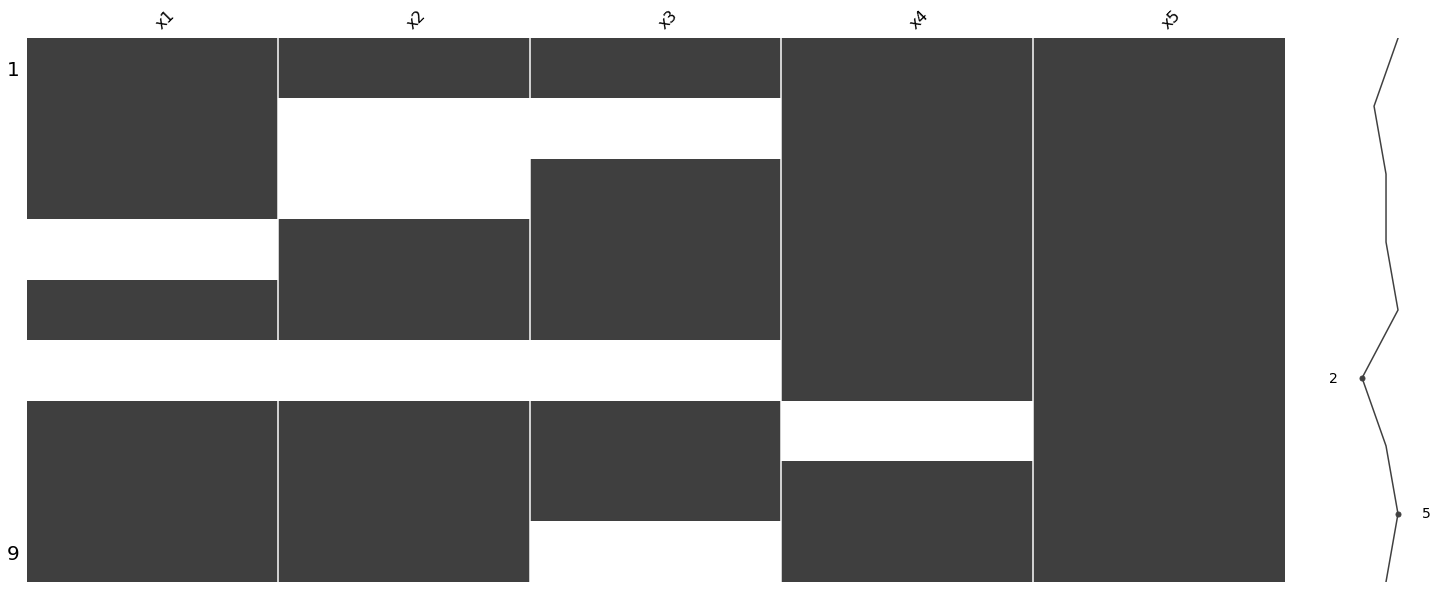

In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline


import missingno as msno
#결측데이터 시각화 함수
#결측 데이터는 흰색, 그렇지 않은 데이터는 검은색

msno.matrix(df)
plt.show()

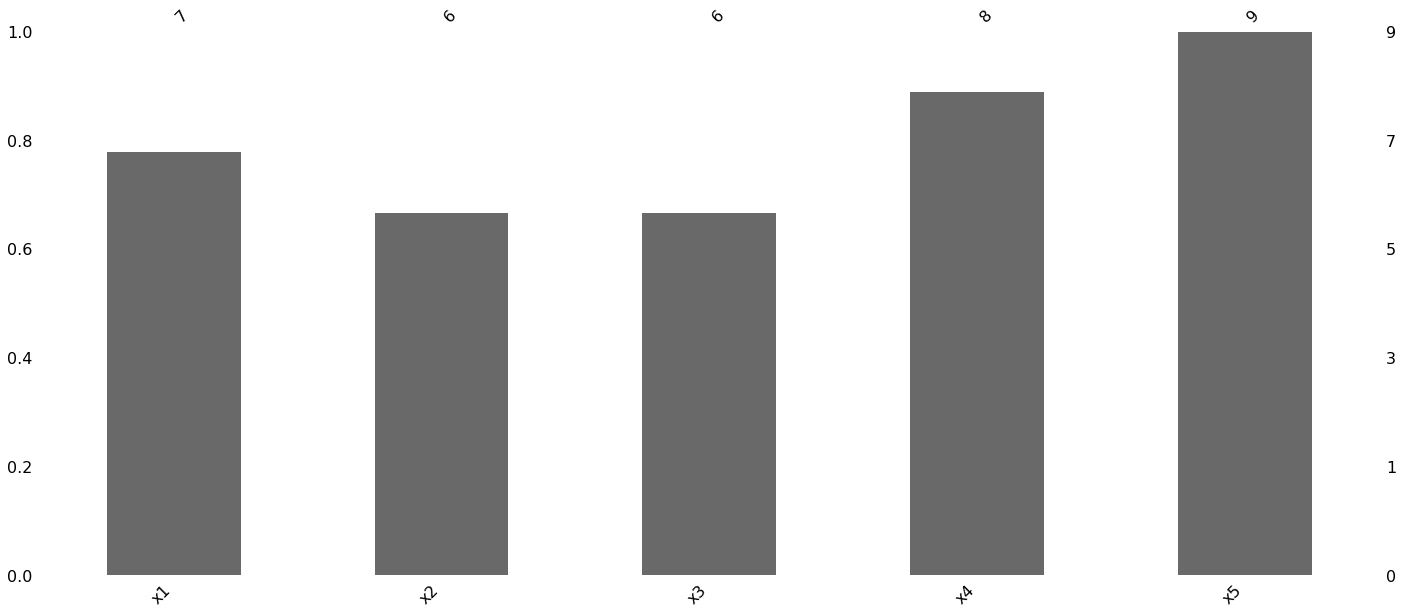

In [11]:
# 만약 각 열에 결측데이터가 얼마나 존재하는지 시각화 하고 싶다면

msno.bar(df)
plt.show()

In [12]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
#타이타닉 생존자 데이터를 이용한 missingno쓰임새를 알아보자
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


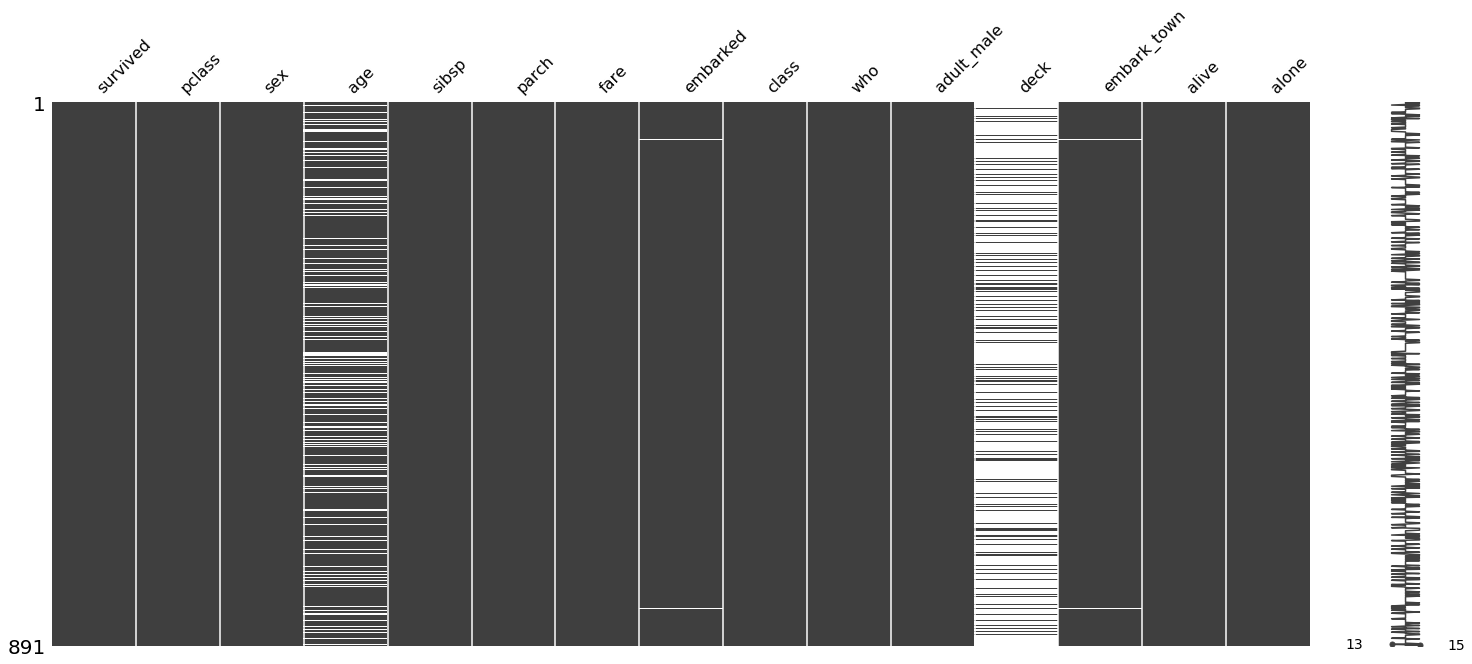

In [14]:
# missingno를 이용하여 타이타닉 데이터에서  age.deck.embarked, embark_town열에 대한 결측데이터 확인
msno.matrix(titanic)
plt.show()

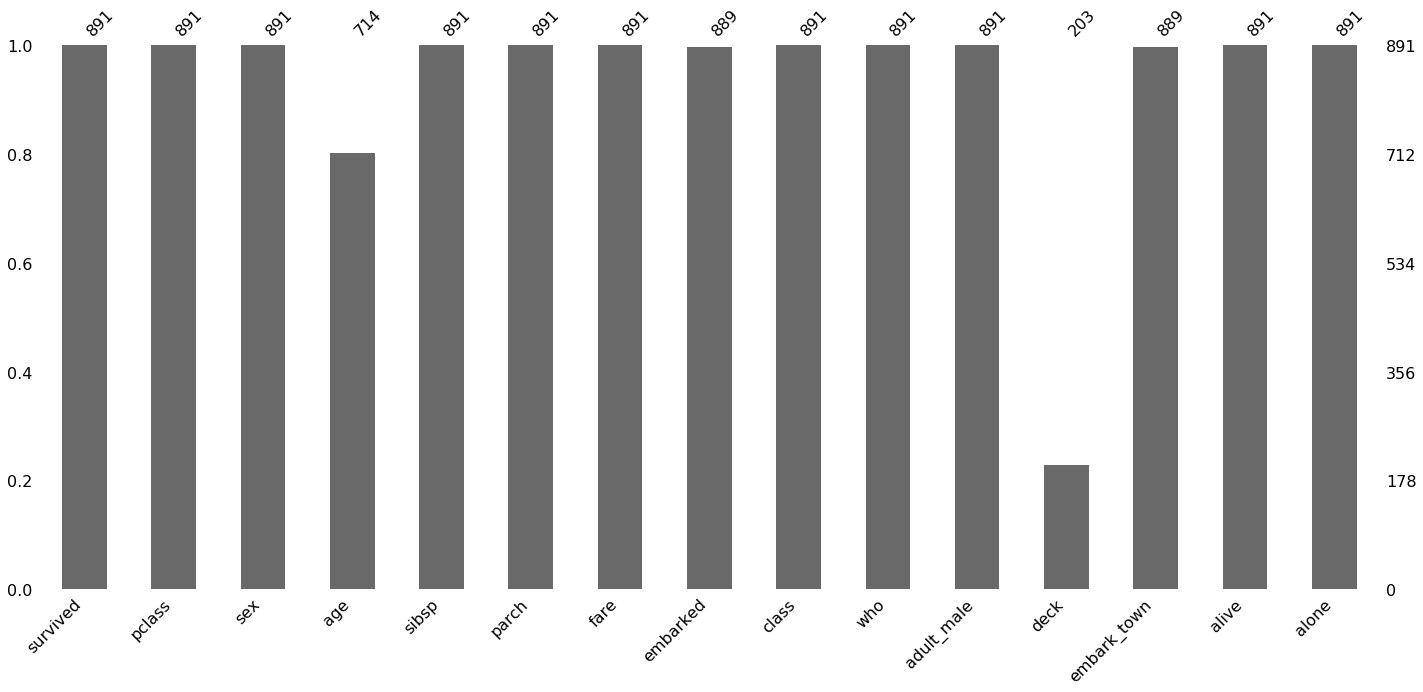

In [15]:
msno.bar(titanic)
plt.show()

### 결측된 데이터를 처리하는 방법
- 결측된 데이터가 너무 많은 경우 해당 데이터의 열 전체를 삭제
- 결측된 데이터가 일부인 경우 가장 그럴듯한 값으로 대체


In [16]:
df

,x1,x2,x3,x4,x5
0,1.0,0.1,1.0,2019-01-01,A
1,2.0,NaN,NaN,2019-01-02,B
2,3.0,NaN,3.0,2019-01-03,C
3,NaN,0.4,4.0,2019-01-04,A
4,5.0,0.5,5.0,2019-01-05,B
5,NaN,NaN,NaN,2019-01-06,C
6,7.0,0.7,7.0,NaN,A
7,8.0,0.8,8.0,2019-01-08,B
8,9.0,0.9,NaN,2019-01-09,C


In [17]:
df.dropna(axis=1)

,x5
0,A
1,B
2,C
3,A
4,B
5,C
6,A
7,B
8,C


In [18]:
#thresh 특정 갯수이상의 비결측 데이터가 있는 행또는 열만 남긴다
df.dropna(thresh =7, axis=1)

,x1,x4,x5
0,1.0,2019-01-01,A
1,2.0,2019-01-02,B
2,3.0,2019-01-03,C
3,NaN,2019-01-04,A
4,5.0,2019-01-05,B
5,NaN,2019-01-06,C
6,7.0,NaN,A
7,8.0,2019-01-08,B
8,9.0,2019-01-09,C


In [19]:
df

,x1,x2,x3,x4,x5
0,1.0,0.1,1.0,2019-01-01,A
1,2.0,NaN,NaN,2019-01-02,B
2,3.0,NaN,3.0,2019-01-03,C
3,NaN,0.4,4.0,2019-01-04,A
4,5.0,0.5,5.0,2019-01-05,B
5,NaN,NaN,NaN,2019-01-06,C
6,7.0,0.7,7.0,NaN,A
7,8.0,0.8,8.0,2019-01-08,B
8,9.0,0.9,NaN,2019-01-09,C


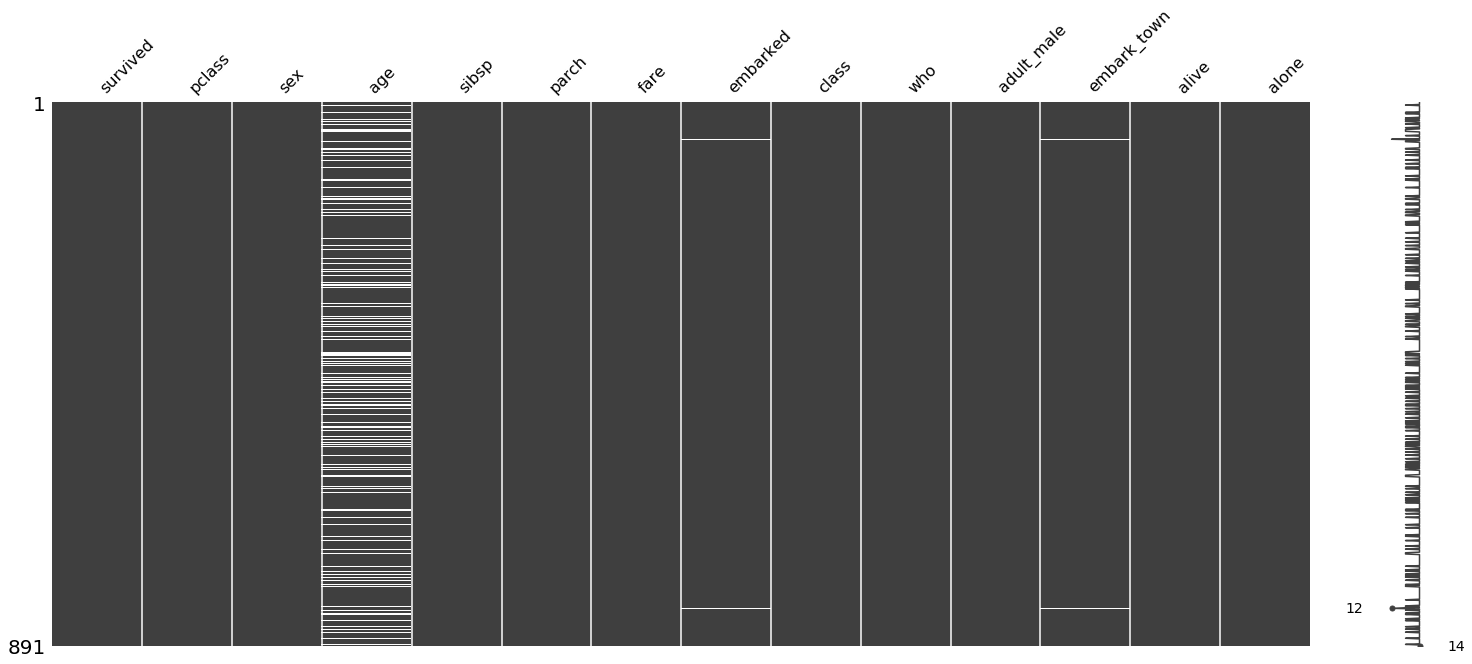

In [20]:
#deck 열을 삭제하고 싶다면

titanic.dropna(thresh= int(len(titanic)*0.5), axis=1,inplace=True)
msno.matrix(titanic)
plt.show()

In [21]:
#결측 데이터를 대체하는 방법 
# sklearn - Simpleimputer(평균, 중앙, 최빈)
# fit transform 대체값이 채원진 데이터 프레임을 생성 할수 있다.



In [22]:
from sklearn.impute import SimpleImputer